# MMDetection Tutorial

Welcome to MMDetection! This is the official colab tutorial for using MMDetection. In this tutorial, you will learn
- Perform inference with a MMDet detector.
- Train a new detector with a new dataset.

Let's start!

In [8]:
import sys
import os
os.path.dirname(sys.executable)

'/home/clusterusers/jporrasgalindo/.conda/envs/openmmlabjp/bin'

In [9]:
import torch
torch.cuda.is_available()

True

In [10]:
torch.cuda.current_device()

0

In [11]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

In [26]:
# Get current wd and change to repository root
%pwd
%cd /home/clusterusers/jporrasgalindo/mmdetection_sandbox/
%pwd

config_file = 'configs/retinanet/retinanet_r50_fpn_1x_coco_flowers.py'  #faster_rcnn_r50_fpn_1x_coco.py
# download the checkpoint from model zoo and put it in `checkpoints/`
# url:sudo wget https://download.openmmlab.com/mmdetection/v2.0/retinanet/retinanet_r50_fpn_1x_coco/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth
checkpoint_file = 'work_dirs/retinanet_r50_fpn_1x_coco_flowers/latest.pth' # faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

/home/clusterusers/jporrasgalindo/mmdetection_sandbox


In [27]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: work_dirs/retinanet_r50_fpn_1x_coco_flowers/latest.pth


In [33]:
# test a single image
img = 'data/aigriflower/test/2020-04-17T15-57-52-861825_jpg.rf.71d70778214ac6381172b5078058087e.jpg'
result = inference_detector(model, img)

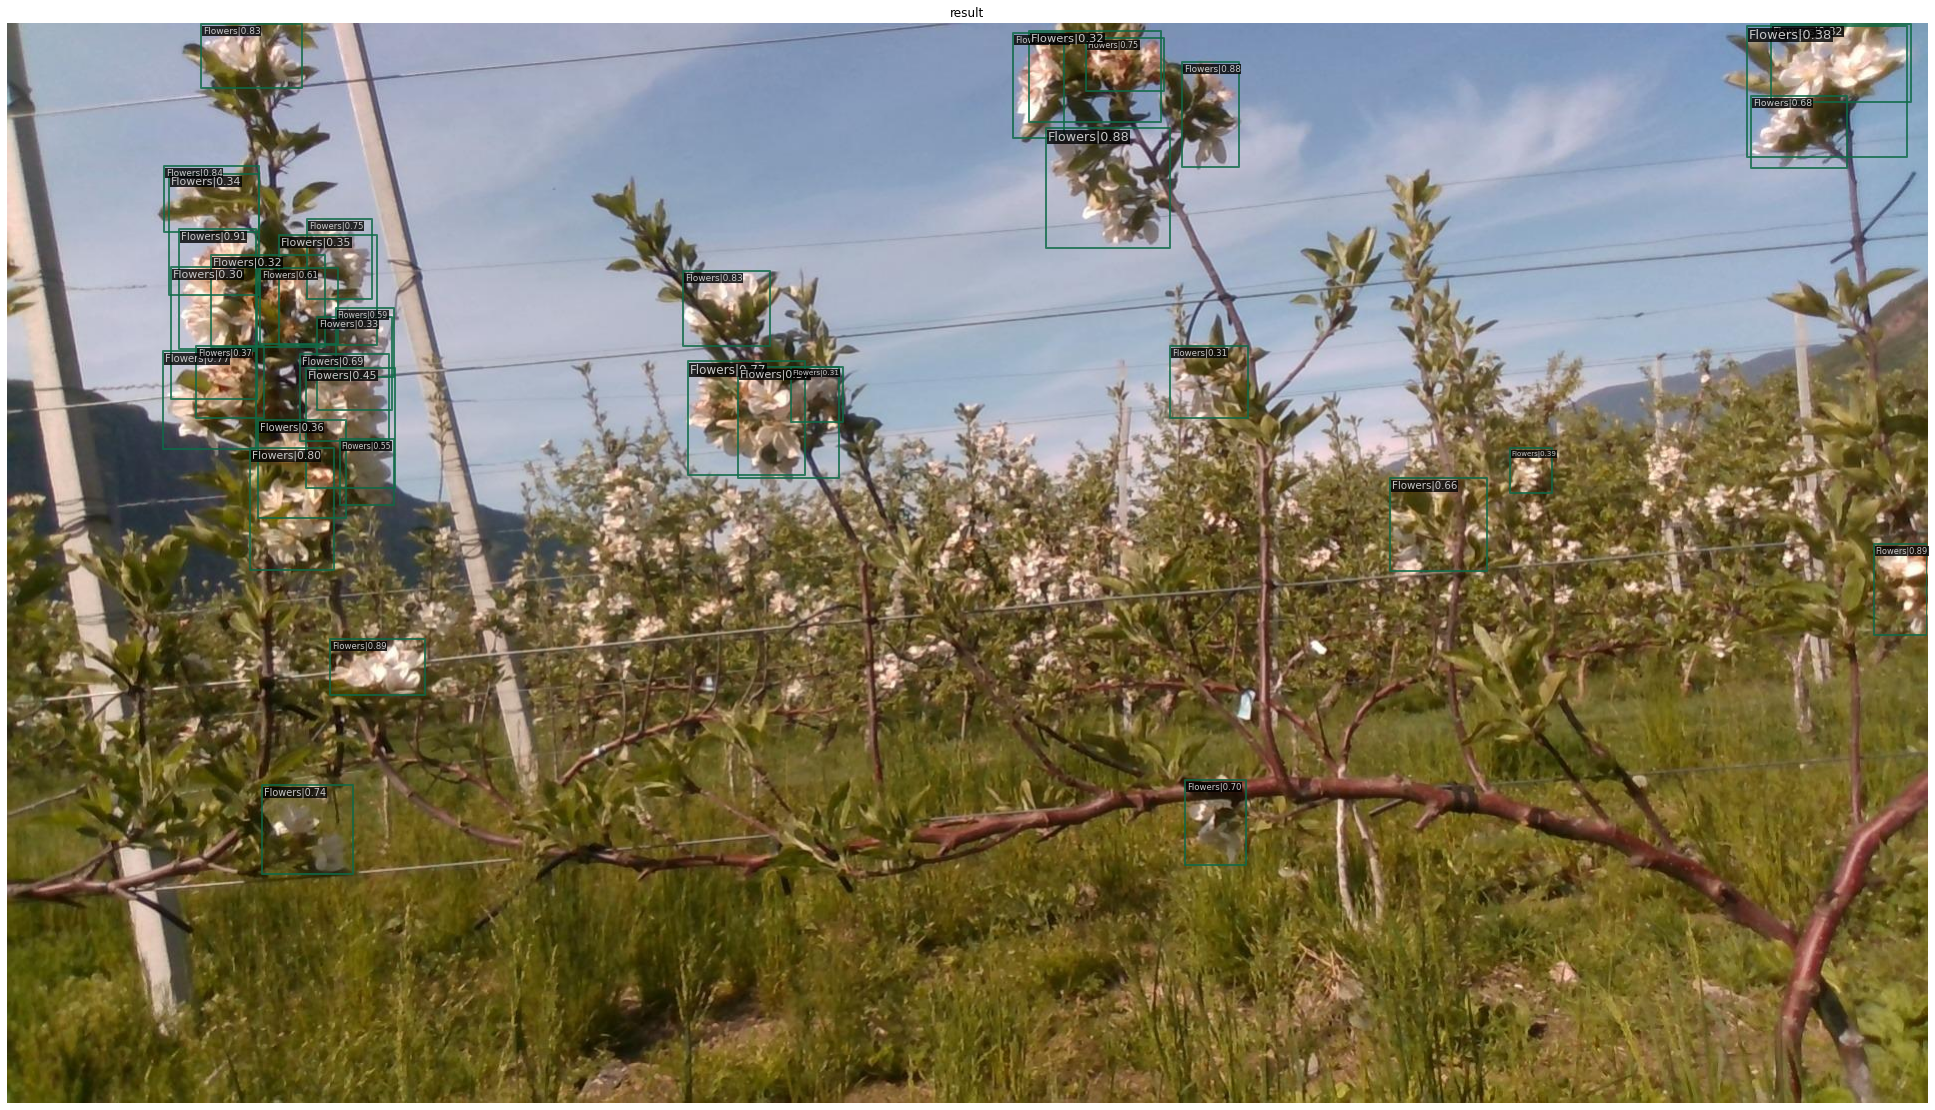

In [34]:
# show the results
show_result_pyplot(model, img, result)

In [31]:
# Run Test inference test
!python tools/test.py \
    configs/retinanet/retinanet_r50_fpn_1x_coco_flowers.py \
    work_dirs/retinanet_r50_fpn_1x_coco_flowers/latest.pth \
    --out results.pkl \
    --eval bbox segm #\
    #--show

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
load checkpoint from local path: work_dirs/retinanet_r50_fpn_1x_coco_flowers/latest.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 72/72, 13.2 task/s, elapsed: 5s, ETA:     0s
writing results to results.pkl

Evaluating bbox...
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.46s).
Accumulating evaluation results...
DONE (t=0.15s).

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.204
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.415
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.182
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.273


loading annotations into memory...
Done (t=0.42s)
creating index...
index created!
load checkpoint from local path: checkpoints/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5000/5000, 4.0 task/s, elapsed: 1253s, ETA:     0s
writing results to results.pkl

Evaluating bbox...
Loading and preparing results...
DONE (t=1.36s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=63.80s).
Accumulating evaluation results...
DONE (t=11.51s).

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.365
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.554
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.391
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.204
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.403
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.481
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.540
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.540
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.540
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.336
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.584
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.691

In [32]:
# Run benchmark for FPS/S throughput
!python tools/analysis_tools/benchmark.py \
    configs/retinanet/retinanet_r50_fpn_1x_coco_flowers.py \
    work_dirs/retinanet_r50_fpn_1x_coco_flowers/latest.pth \
    --fuse-conv-bn \
    --log-interval 50

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
load checkpoint from local path: work_dirs/retinanet_r50_fpn_1x_coco_flowers/latest.pth
Done image [50 / 2000], fps: 18.6 img / s


loading annotations into memory...
Done (t=0.46s)
creating index...
index created!
load checkpoint from local path: checkpoints/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth
Done image [50 / 2000], fps: 4.1 img / s
Done image [100/ 2000], fps: 4.0 img / s
Done image [150/ 2000], fps: 4.0 img / s
Done image [200/ 2000], fps: 4.1 img / s
Done image [250/ 2000], fps: 4.0 img / s
Done image [300/ 2000], fps: 4.1 img / s
Done image [350/ 2000], fps: 4.1 img / s
Done image [400/ 2000], fps: 4.1 img / s
Done image [450/ 2000], fps: 4.1 img / s
Done image [500/ 2000], fps: 4.1 img / s
Done image [550/ 2000], fps: 4.1 img / s
Done image [600/ 2000], fps: 4.1 img / s
Done image [650/ 2000], fps: 4.1 img / s
Done image [700/ 2000], fps: 4.1 img / s
Done image [750/ 2000], fps: 4.1 img / s
Done image [800/ 2000], fps: 4.1 img / s
Done image [850/ 2000], fps: 4.1 img / s
Done image [900/ 2000], fps: 4.1 img / s
Done image [950/ 2000], fps: 4.1 img / s
Done image [1000/ 2000], fps: 4.1 img / s
Done image [1050/ 2000], fps: 4.1 img / s
Done image [1100/ 2000], fps: 4.1 img / s
Done image [1150/ 2000], fps: 4.1 img / s
Done image [1200/ 2000], fps: 4.1 img / s
Done image [1250/ 2000], fps: 4.1 img / s
Done image [1300/ 2000], fps: 4.1 img / s
Done image [1350/ 2000], fps: 4.1 img / s
Done image [1400/ 2000], fps: 4.1 img / s
Done image [1450/ 2000], fps: 4.1 img / s
Done image [1500/ 2000], fps: 4.1 img / s
Done image [1550/ 2000], fps: 4.1 img / s
Done image [1600/ 2000], fps: 4.1 img / s
Done image [1650/ 2000], fps: 4.1 img / s
Done image [1700/ 2000], fps: 4.1 img / s
Done image [1750/ 2000], fps: 4.1 img / s
Done image [1800/ 2000], fps: 4.1 img / s
Done image [1850/ 2000], fps: 4.1 img / s
Done image [1900/ 2000], fps: 4.1 img / s
Done image [1950/ 2000], fps: 4.1 img / s
Done image [2000/ 2000], fps: 4.1 img / s
Overall fps: 4.1 img / s

In [ ]:
# Export to ONXX

!python tools/deployment/pytorch2onnx.py \
    configs/retinanet/retinanet_r50_fpn_1x_coco.py \
    checkpoints/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth \
    --output-file checkpoints/retinanet_r50_fpn_1x_coco.onnx \
    --input-img demo/demo.jpg \
    --shape 608 608 \
    --show \
    --verify

In [ ]:
# Convert ONNX to tensor RT
!python tools/deployment/onnx2tensorrt.py \
    configs/retinanet/retinanet_r50_fpn_1x_coco.py \
    checkpoints/retinanet_r50_fpn_1x_coco.onnx \
    --trt-file checkpoints/retinanet_r50_fpn_1x_coco.trt \
    --input-img demo/demo.jpg \
    --shape 400 600 \
    --show \
    --verify \

In [25]:
# TRain with flowers config

!python tools/train.py configs/retinanet/retinanet_r50_fpn_1x_coco_flowers.py

/home/clusterusers/jporrasgalindo/.conda/envs/openmmlabjp/lib/python3.7/site-packages/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/home/clusterusers/jporrasgalindo/.conda/envs/openmmlabjp/lib/python3.7/site-packages/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-03-22 16:53:58,885 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.11 (default, Jul 27 2021, 14:32:16) [G